In [509]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [510]:
df = pd.read_excel('Sample_Searches.xlsx')
df

,date,search term,application,device,channel,client
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B
...,...,...,...,...,...,...
33358,2022-01-31,locked,website,Apple/iPhone XR,Digital,Client C
33359,2022-01-31,TalkBack,website,Motorola/XT1675 Moto G5,Digital,Client C
33360,2022-01-31,Block contact on my phone,website,Nokia/105,Digital,Client B
33361,2022-01-31,visual voicemail,website,Motorola/XT2053 Moto e6s,Digital,Client C


In [511]:
df['device'].unique()

array(['Apple/AirPods', 'Samsung/Galaxy A71', 'Apple/iPhone 12',
       'Apple/iPhone 11', 'Apple/iPhone 8', 'Samsung/Galaxy A32 5G',
       'Doro/6520', 'Apple/iPhone SE 2nd generation', 'Huawei/P30',
       'Samsung/Galaxy Note10 Plus', 'Sony/Xperia XA1',
       'Samsung/Galaxy S21 Plus 5G', 'Google/Generic Android Device',
       'Motorola/XT1955 Moto G7 Power', 'Apple/iPhone SE',
       'Samsung/Galaxy S9', 'Samsung/Galaxy A22 5G', 'IMO/Q4 Pro',
       'Samsung/Galaxy A40', 'Samsung/Galaxy S20 FE', 'Apple/iPhone XR',
       'Samsung/Galaxy Z Fold3 5G',
       'Apple/iPad Pro 12.9 4G Wi-Fi 4th generation',
       'Apple/iPhone Xs Max', 'Apple/iPhone 13', 'Apple/iPhone 7',
       'Apple/iPhone 12 mini', 'Samsung/Galaxy A42 5G',
       'Apple/iPhone 12 Pro Max', 'Sony/Xperia 10', 'Samsung/Galaxy A7',
       'IMO/Dash 4G', 'Apple/iPhone X', 'Samsung/Galaxy S10 Plus',
       'OnePlus/5', 'Alcatel/3L', 'IMO/Go', 'Motorola/Moto e6 Plus',
       'Apple/iPhone 13 Pro', 'Samsung/Galaxy A41',

In [512]:
df['device brand'] = df['device'].str.split('/').str[0]

In [513]:
df.isnull()

,date,search term,application,device,channel,client,device brand
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
33358,False,False,False,False,False,False,False
33359,False,False,False,False,False,False,False
33360,False,False,False,False,False,False,False
33361,False,False,False,False,False,False,False


In [514]:
df.head()

,date,search term,application,device,channel,client,device brand
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B,Apple
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C,Samsung
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C,Apple
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B,Apple
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B,Apple


In [515]:
df['search term'] = df['search term'].astype(str)

In [516]:
#creating a function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function for polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['search term'].apply(getSubjectivity)
df['Polarity'] = df['search term'].apply(getPolarity)

In [517]:
df.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B,Apple,0.0,0.0
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C,Samsung,0.0,0.0
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C,Apple,0.0,0.0
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B,Apple,0.0,0.0
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B,Apple,0.0,0.0


In [518]:
#Function for negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#updated dataframe
df.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B,Apple,0.0,0.0,Neutral
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C,Samsung,0.0,0.0,Neutral
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C,Apple,0.0,0.0,Neutral
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B,Apple,0.0,0.0,Neutral
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B,Apple,0.0,0.0,Neutral


<AxesSubplot:title={'center':'Polarity of search terms'}, ylabel='Analysis'>

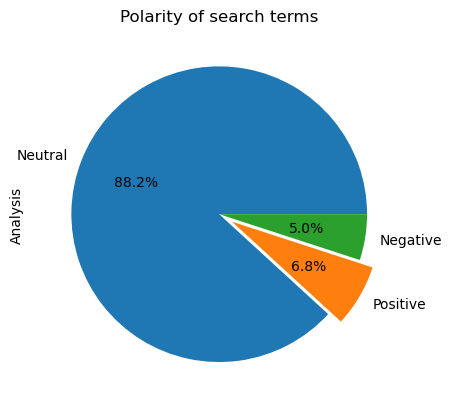

In [519]:
explode = (0, 0.1, 0) 
df['Analysis'].value_counts().plot(kind='pie',
                                  explode=explode,
                                  title='Polarity of search terms',
                                  autopct="%0.1f%%")

In [520]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juniorturpin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juniorturpin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juniorturpin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/juniorturpin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juniorturpin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [521]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

stop_words = set(stopwords.words('english'))

def create_ngrams(text, n):
    tokens = [word for word in nltk.word_tokenize(text) if word.lower() not in stop_words]
    return list(ngrams(tokens, n))

df['bigrams'] = df['search term'].apply(lambda x: create_ngrams(x, 2))

df

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Ear, detection)]"
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C,Samsung,0.0,0.0,Neutral,"[(Headphone, port), (port, working)]"
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C,Apple,0.0,0.0,Neutral,[]
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Parental, control)]"
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Parental, lock)]"
...,...,...,...,...,...,...,...,...,...,...,...
33358,2022-01-31,locked,website,Apple/iPhone XR,Digital,Client C,Apple,0.0,0.0,Neutral,[]
33359,2022-01-31,TalkBack,website,Motorola/XT1675 Moto G5,Digital,Client C,Motorola,0.0,0.0,Neutral,[]
33360,2022-01-31,Block contact on my phone,website,Nokia/105,Digital,Client B,Nokia,0.0,0.0,Neutral,"[(Block, contact), (contact, phone)]"
33361,2022-01-31,visual voicemail,website,Motorola/XT2053 Moto e6s,Digital,Client C,Motorola,0.0,0.0,Neutral,"[(visual, voicemail)]"


In [522]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

stop_words = set(stopwords.words('english'))

def create_ngrams(text, n):
    tokens = [word for word in nltk.word_tokenize(text) if word.lower() not in stop_words]
    return list(ngrams(tokens, n))

df['unigrams'] = df['search term'].apply(lambda x: create_ngrams(x, 1))
df

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams,unigrams
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Ear, detection)]","[(Ear,), (detection,)]"
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C,Samsung,0.0,0.0,Neutral,"[(Headphone, port), (port, working)]","[(Headphone,), (port,), (working,)]"
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C,Apple,0.0,0.0,Neutral,[],"[(Hotspot,)]"
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Parental, control)]","[(Parental,), (control,)]"
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Parental, lock)]","[(Parental,), (lock,)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
33358,2022-01-31,locked,website,Apple/iPhone XR,Digital,Client C,Apple,0.0,0.0,Neutral,[],"[(locked,)]"
33359,2022-01-31,TalkBack,website,Motorola/XT1675 Moto G5,Digital,Client C,Motorola,0.0,0.0,Neutral,[],"[(TalkBack,)]"
33360,2022-01-31,Block contact on my phone,website,Nokia/105,Digital,Client B,Nokia,0.0,0.0,Neutral,"[(Block, contact), (contact, phone)]","[(Block,), (contact,), (phone,)]"
33361,2022-01-31,visual voicemail,website,Motorola/XT2053 Moto e6s,Digital,Client C,Motorola,0.0,0.0,Neutral,"[(visual, voicemail)]","[(visual,), (voicemail,)]"


In [526]:
from wordcloud import WordCloud, STOPWORDS

In [527]:
text = str(df['search term'])
stopwords = STOPWORDS

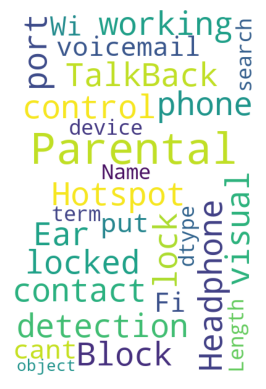

In [540]:
wc = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width = 400
)

wc.generate(str(df['search term']))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('general_wordcloud.jpg')

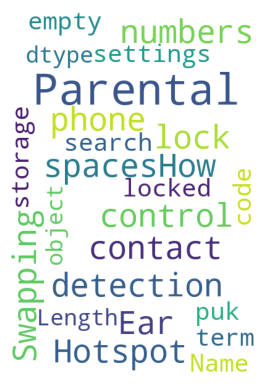

In [530]:
applewc = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width = 400
)

wc.generate(str(apple['search term']))
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file('apple_wordcloud.jpg')

In [531]:
apple = df[df['device brand'] == 'Apple']
apple.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams,unigrams
0,2021-12-01,Ear detection,website,Apple/AirPods,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Ear, detection)]","[(Ear,), (detection,)]"
2,2021-12-01,Hotspot,website,Apple/iPhone 12,Digital,Client C,Apple,0.0,0.0,Neutral,[],"[(Hotspot,)]"
3,2021-12-01,Parental control,website,Apple/iPhone 11,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Parental, control)]","[(Parental,), (control,)]"
4,2021-12-01,Parental lock,website,Apple/iPhone 8,Digital,Client B,Apple,0.0,0.0,Neutral,"[(Parental, lock)]","[(Parental,), (lock,)]"
7,2021-12-01,Why do my contact numbers have spacesHow can I...,website,Apple/iPhone SE 2nd generation,Digital,Client B,Apple,0.0,0.0,Neutral,"[(contact, numbers), (numbers, spacesHow), (sp...","[(contact,), (numbers,), (spacesHow,), (correc..."


In [532]:
samsung = df[df['device brand'] == 'Samsung']
samsung.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams,unigrams
1,2021-12-01,Headphone port not working,website,Samsung/Galaxy A71,Digital,Client C,Samsung,0.000000,0.000000,Neutral,"[(Headphone, port), (port, working)]","[(Headphone,), (port,), (working,)]"
5,2021-12-01,How to delete all emails,website,Samsung/Galaxy A32 5G,Digital,Client B,Samsung,0.000000,0.000000,Neutral,"[(delete, emails)]","[(delete,), (emails,)]"
9,2021-12-01,Is there any Samsung Galaxy Note 10 available,website,Samsung/Galaxy Note10 Plus,Digital,Client B,Samsung,0.400000,0.400000,Positive,"[(Samsung, Galaxy), (Galaxy, Note), (Note, 10)...","[(Samsung,), (Galaxy,), (Note,), (10,), (avail..."
11,2021-12-01,Why is my phone got a black screen,website,Samsung/Galaxy A32 5G,Digital,Client C,Samsung,0.433333,-0.166667,Negative,"[(phone, got), (got, black), (black, screen)]","[(phone,), (got,), (black,), (screen,)]"
12,2021-12-01,reset,website,Samsung/Galaxy S21 Plus 5G,Digital,Client B,Samsung,0.000000,0.000000,Neutral,[],"[(reset,)]"


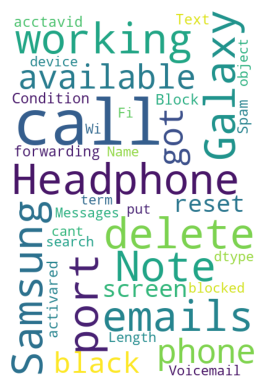

In [533]:
wc.generate(str(samsung['search term']))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('samsung_wordcloud.jpg')

In [534]:
motorola = df[df['device brand'] == 'Motorola']
motorola.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams,unigrams
15,2021-12-01,Signal,website,Motorola/XT1955 Moto G7 Power,Digital,Client C,Motorola,0.0,0.0,Neutral,[],"[(Signal,)]"
53,2021-12-01,motorola g10,agent tool,Motorola/Moto e6 Plus,Agent,Client B,Motorola,0.0,0.0,Neutral,"[(motorola, g10)]","[(motorola,), (g10,)]"
95,2021-12-01,not receiving all texts,website,Motorola/XT2029 Moto e6 Play,Digital,Client C,Motorola,0.0,0.0,Neutral,"[(receiving, texts)]","[(receiving,), (texts,)]"
103,2021-12-01,reset network,agent tool,Motorola/XT1925 Moto G6,Agent,Client B,Motorola,0.0,0.0,Neutral,"[(reset, network)]","[(reset,), (network,)]"
159,2021-12-01,motorola moto e6 play ocean blue,agent tool,Motorola/XT2029 Moto e6 Play,Agent,Client C,Motorola,0.1,0.0,Neutral,"[(motorola, moto), (moto, e6), (e6, play), (pl...","[(motorola,), (moto,), (e6,), (play,), (ocean,..."


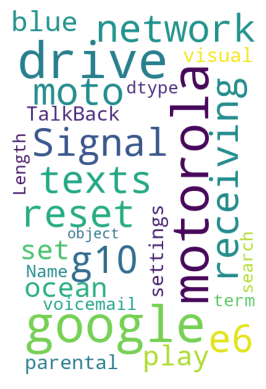

In [535]:
wc.generate(str(motorola['search term']))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('motorola_wordcloud.jpg')

In [536]:
nokia = df[df['device brand'] == 'Nokia']
nokia.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams,unigrams
108,2021-12-01,How to use internet,website,Nokia/216,Digital,Client B,Nokia,0.0,0.0,Neutral,"[(use, internet)]","[(use,), (internet,)]"
109,2021-12-01,no network,website,Nokia/G10,Digital,Client C,Nokia,0.0,0.0,Neutral,[],"[(network,)]"
114,2021-12-01,download pictures,website,Nokia/5.4,Digital,Client A,Nokia,0.0,0.0,Neutral,"[(download, pictures)]","[(download,), (pictures,)]"
175,2021-12-01,vibration,agent tool,Nokia/1 Plus,Agent,Client A,Nokia,0.0,0.0,Neutral,[],"[(vibration,)]"
196,2021-12-01,Can I access the web,website,Nokia/G10,Digital,Client C,Nokia,0.0,0.0,Neutral,"[(access, web)]","[(access,), (web,)]"


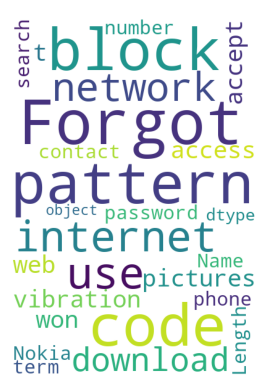

In [537]:
wc.generate(str(nokia['search term']))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('nokia_wordcloud.jpg')

In [538]:
alcatel = df[df['device brand'] == 'Alcatel']
alcatel.head()

,date,search term,application,device,channel,client,device brand,Subjectivity,Polarity,Analysis,bigrams,unigrams
46,2021-12-01,Sp code,website,Alcatel/3L,Digital,Client C,Alcatel,0.0,0.0,Neutral,"[(Sp, code)]","[(Sp,), (code,)]"
49,2021-12-01,Sp,website,Alcatel/3L,Digital,Client C,Alcatel,0.0,0.0,Neutral,[],"[(Sp,)]"
179,2021-12-01,Unlocking from numbers given,website,Alcatel/Pop 4 5-inch,Digital,Client C,Alcatel,0.0,0.0,Neutral,"[(Unlocking, numbers), (numbers, given)]","[(Unlocking,), (numbers,), (given,)]"
187,2021-12-01,Unlocking phone,website,Alcatel/Pop 4 5-inch,Digital,Client C,Alcatel,0.0,0.0,Neutral,"[(Unlocking, phone)]","[(Unlocking,), (phone,)]"
189,2021-12-01,How to unlock phone with numbers provided,website,Alcatel/Pop 4 5-inch,Digital,Client C,Alcatel,0.0,0.0,Neutral,"[(unlock, phone), (phone, numbers), (numbers, ...","[(unlock,), (phone,), (numbers,), (provided,)]"


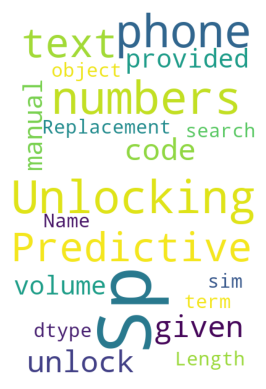

In [539]:
wc.generate(str(alcatel['search term']))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('alcatel_wordcloud.jpg')